In [1]:
%matplotlib notebook

In [2]:
from mandelbrot import calculate_mandelbrot_set
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

In [29]:
class MB:
    def __init__(self):
        self.x_min = -2
        self.x_max = 0.5
        self.y_min = -1.25
        self.y_max = 1.25
        self.side = 1000
        self.n_iter = 100
        
        self.x_span = np.abs(self.x_max - self.x_min)
        self.y_span = np.abs(self.y_max - self.y_min)
        
        self.mb = self.get_mandelbrot()
        self.cmap = "viridis"
        self.fig, self.ax = plt.subplots()
        self.img = self.ax.imshow(self.mb, cmap = self.cmap)       
        self.fig.canvas.mpl_connect("button_press_event", self.handle_mouse_press)
        
        self.draw()
        
    def draw(self):
        self.mb = self.get_mandelbrot()
        self.img.set_data(self.mb)
        self.img.set_cmap(self.cmap)
        self.img.autoscale()
        plt.draw()
        #self.ax.set_xticks(np.linspace(0, self.side, 4))
        self.ax.set_xticklabels(np.linspace(self.x_min, self.x_max, 8), rotation = 90)
        #self.ax.set_yticks(np.linspace(0, self.side, 4))
        self.ax.set_yticklabels(np.linspace(self.y_min, self.y_max, 8))
        
    def handle_mouse_press(self, event):
        if event.button == 1:
            x = self.map_value(event.xdata, 0, self.side, self.x_min, self.x_max)
            y = self.map_value(event.ydata, 0, self.side, self.y_min, self.y_max)

            self.zoom_in(x, y)

        elif event.button == 3:   
            self.zoom_out()
            self.img.set_data(self.mb)
            self.img.autoscale()
            plt.draw()
    
    def map_value(self, x, in_min, in_max, out_min, out_max):
        return (x-in_min) * (out_max-out_min) / (in_max-in_min) + out_min
    
    def get_mandelbrot(self):
        return calculate_mandelbrot_set(self.x_min, self.x_max,
                                           self.y_min, self.y_max,
                                           self.side, self.side, self.n_iter)
    def zoom_in(self, x, y):
        self.x_span = np.abs(self.x_max - self.x_min) * 0.5
        self.y_span = np.abs(self.y_max - self.y_min) * 0.5
        self.x_min = x - self.x_span / 2
        self.x_max = x + self.x_span / 2
        self.y_min = y - self.y_span / 2
        self.y_max = y + self.y_span / 2
        self.draw()
        
    def zoom_out(self):
        self.x_span = np.abs(self.x_max - self.x_min) * 1.5
        self.y_span = np.abs(self.y_max - self.y_min) * 1.5
        self.x_min = self.map_value(self.x_min, self.x_min, self.x_max, 
                                    self.x_min - self.x_span/2, self.x_max + self.x_span/2)
        self.x_max = self.map_value(self.x_max, self.x_min, self.x_max, 
                                    self.x_min - self.x_span/2, self.x_max + self.x_span/2)
        self.y_min = self.map_value(self.y_min, self.y_min, self.y_max, 
                                    self.y_min - self.y_span/2, self.y_max + self.y_span/2)
        self.y_max = self.map_value(self.y_max, self.y_min, self.y_max, 
                                    self.y_min - self.y_span/2, self.y_max + self.y_span/2)
        self.draw()

<IPython.core.display.Javascript object>


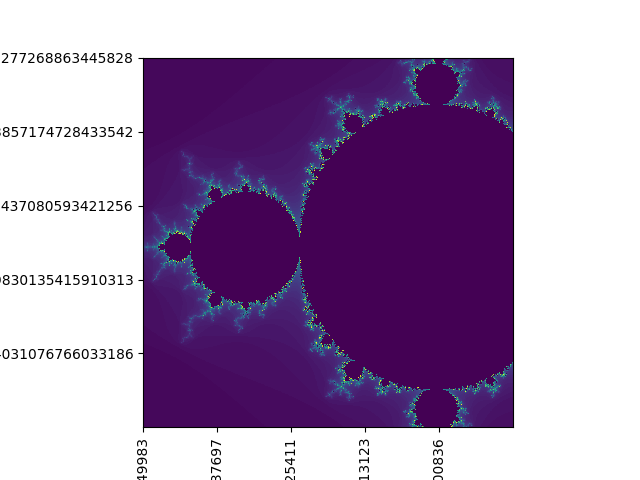

In [30]:
mb = MB()

In [32]:
@widgets.interact
def plot_controls(cmap = widgets.Dropdown(options = plt.colormaps(), value = "viridis"), 
                  n_iter = widgets.IntSlider(min = 100, max = 2**11, value = 100, continuous_update = False),
                  side = widgets.IntSlider(min = 10, max = 1500, value = 1000, continuous_update = False)):
    mb.side = side
    mb.cmap = cmap
    mb.n_iter = n_iter
    mb.draw()
    

interactive(children=(Dropdown(description='cmap', index=160, options=('Accent', 'Accent_r', 'Blues', 'Blues_r…